In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data=data.rename(columns ={'Delivery Time':'dt','Sorting Time':'st'}, inplace =False)

In [7]:
data.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation 

In [8]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [9]:
corrMatrix = data.corr()

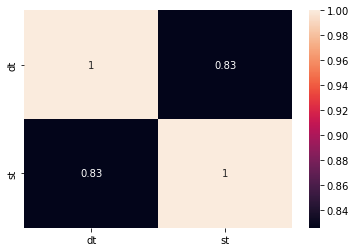

In [10]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

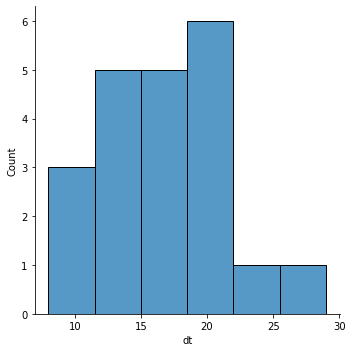

In [11]:
sns.displot(data['dt'])

<AxesSubplot:xlabel='st', ylabel='Density'>

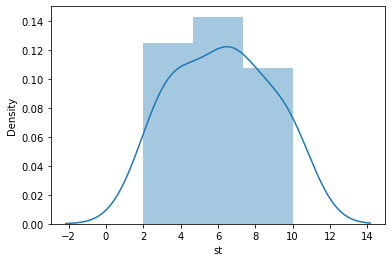

In [12]:
sns.distplot(data['st'])

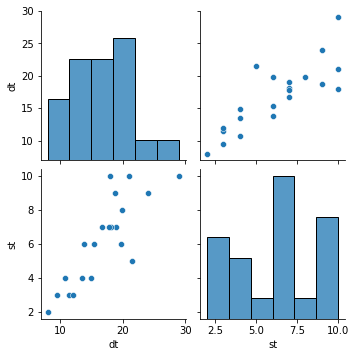

In [13]:
sns.pairplot(data)

<AxesSubplot:xlabel='dt'>

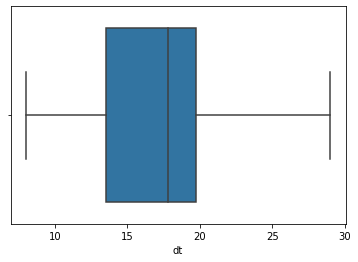

In [14]:
sns.boxplot(data['dt'])

<AxesSubplot:xlabel='st'>

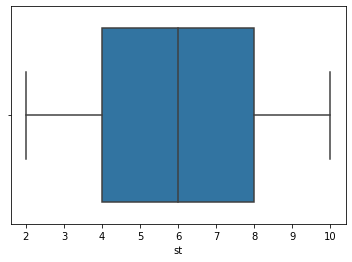

In [15]:
sns.boxplot(data['st'])

<AxesSubplot:>

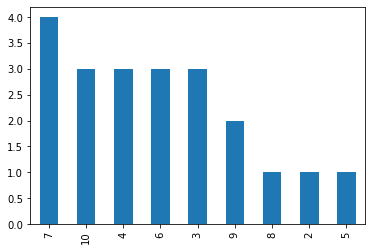

In [16]:
data['st'].value_counts().plot.bar()

In [17]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols("dt~st",data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:54:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

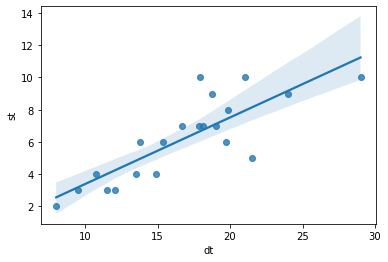

In [20]:
sns.regplot(x='dt', y='st', data=data);

In [21]:
#coeff
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [22]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predicting for new data point

In [24]:
test_data = pd.DataFrame({'st': [10,20]})
test_data

,st
0,10
1,20


In [25]:
model.predict(test_data)

0    23.072933
1    39.563132
dtype: float64